In [354]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [355]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\IPyNb


In [356]:
df = pd.read_csv("../Python/Output/AdjMatrix.txt", sep='\t')
df.head()

,NoiseType,Noise,Size,Repeat,Adjugate Error Deviation,Adjugate Error Mean,Adjugate Error Minimum,Adjugate Error Maximum,Adjugate Uncertainty Deviation,Adjugate Uncertainty Mean,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,Gaussian,0.000000e+00,4,47,0.000000,0.000000,0.000000,0.000000,1.006540e-09,1.752409e-09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
1,Gaussian,1.000000e-17,4,47,0.050591,-0.001002,-0.896725,0.497363,4.226538e-03,2.806799e-04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2,Gaussian,1.000000e-16,4,47,0.710295,-0.000697,-2.438261,2.198913,1.821766e-02,3.208516e-03,...,0.026279,0.006916,0.015214,0.000000,0.002766,0.004149,0.000000,0.000000,0.00000,0.000000
3,Gaussian,1.000000e-15,4,47,0.959363,0.052947,-3.179114,3.152602,2.395925e-02,4.652442e-03,...,0.038356,0.027397,0.020548,0.016438,0.012329,0.012329,0.004110,0.000000,0.00274,0.000000
4,Gaussian,1.000000e-14,4,47,0.962968,-0.079833,-3.225758,3.460428,2.382838e-02,5.139397e-03,...,0.025921,0.024557,0.020464,0.015007,0.006821,0.002729,0.006821,0.004093,0.00000,0.001364


In [357]:
df.columns

Index(['NoiseType', 'Noise', 'Size', 'Repeat', 'Adjugate Error Deviation',
       'Adjugate Error Mean', 'Adjugate Error Minimum',
       'Adjugate Error Maximum', 'Adjugate Uncertainty Deviation',
       'Adjugate Uncertainty Mean', 'Adjugate Uncertainty Minimum',
       'Adjugate Uncertainty Maximum', 'Forward Error Deviation',
       'Forward Error Mean', 'Forward Error Minimum', 'Forward Error Maximum',
       'Forward Precision Deviation', 'Forward Precision Mean',
       'Forward Precision Minimum', 'Forward Precision Maximum',
       'Roundtrip Error Deviation', 'Roundtrip Error Mean',
       'Roundtrip Error Minimum', 'Roundtrip Error Maximum',
       'Roundtrip Precision Deviation', 'Roundtrip Precision Mean',
       'Roundtrip Precision Minimum', 'Roundtrip Precision Maximum',
       'Multiply Error Deviation', 'Multiply Error Mean',
       'Multiply Error Minimum', 'Multiply Error Maximum', 'Forward Loss',
       'Roundtrip Loss', 'Multiply Loss', '-3.0', '-2.8', '-2.6', '-2

# Overall

In [358]:
def PlotSurface(value, title='', logz=False, zlim=[]):
    dfOrderVsNoise = df[(df['Noise']>0)]\
                .pivot(index='Noise', columns='Size', values=value)
    sOrder = dfOrderVsNoise.columns.values
    sNoise = dfOrderVsNoise.index.values
    sX, sY = np.meshgrid(sOrder, sNoise)
    sY = np.log10(sY)
    sZ = np.log10(dfOrderVsNoise.values) if logz else dfOrderVsNoise.values
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(30, -45) if logz else ax.view_init(30, 45)
    surf = ax.plot_surface( sX, sY, sZ, cmap=plt.cm.spring if logz else plt.cm.winter )
    cb = fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.15)
    
    if title:
        ax.set_title(title)
    else:
        ax.set_title(f'{value}')
    
    ax.set_xlabel('Size')
    sXTick = [sOrder[i] for i in range(0, len(sOrder), 1)]
    ax.set_xticks(sXTick, [f'{x}' for x in sXTick])
    
    ax.set_ylabel('Input Noise')
    sYTick = [sNoise[i] for i in range(0, len(sNoise), 3)]
    ax.set_yticks(np.log10(sYTick), [f'{y:.1e}' for y in sYTick])
    
    ax.set_zlabel(value)
    if logz:
        zMin = int(math.floor(np.min(sZ)))
        zMax = int(math.ceil(np.max(sZ)))
        sZTick = range(zMin, zMax, int(math.ceil((zMax - zMin)/10)))
        ax.set_zticks(sZTick, [f'1e{z:+}' for z in sZTick])
    elif zlim:
        ax.set_zlim(zlim)

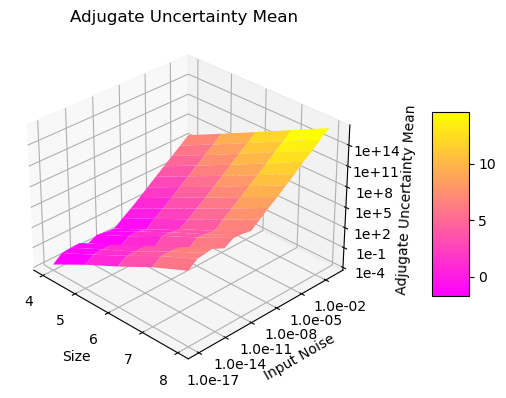

In [359]:
PlotSurface('Adjugate Uncertainty Mean', logz=True)

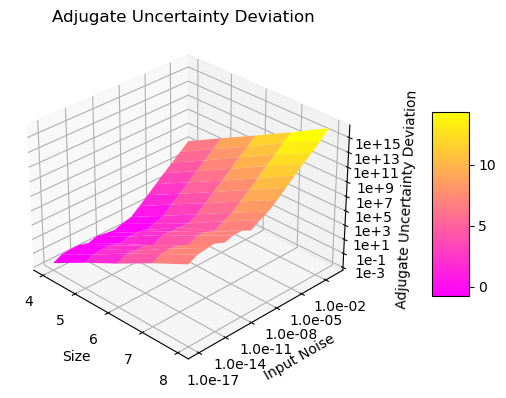

In [360]:
PlotSurface('Adjugate Uncertainty Deviation', logz=True)

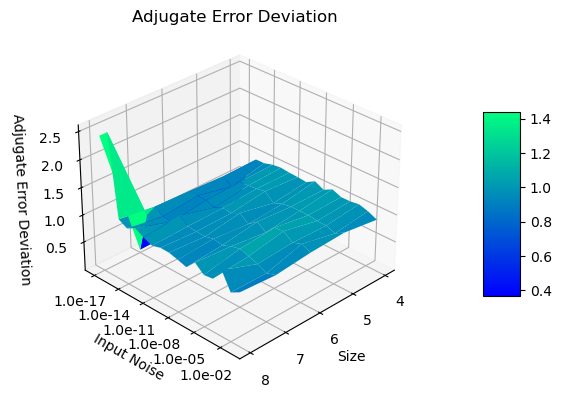

In [361]:
PlotSurface('Adjugate Error Deviation')

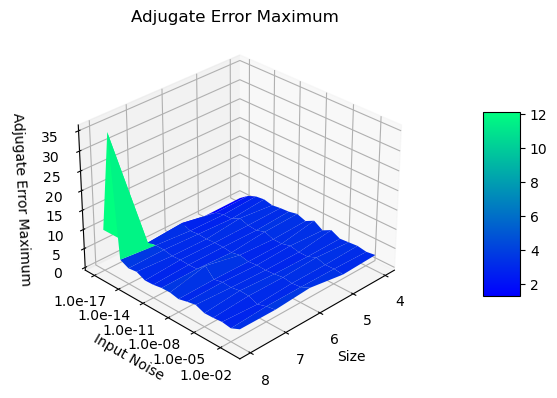

In [362]:
PlotSurface('Adjugate Error Maximum')

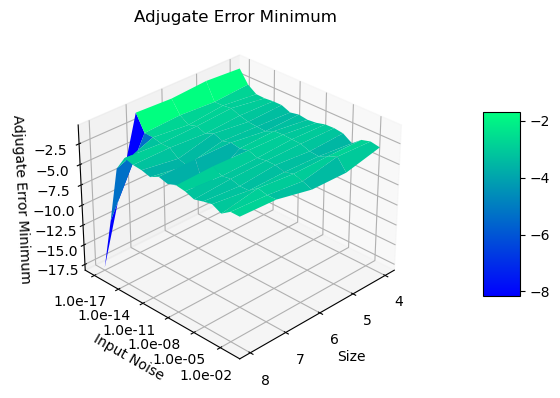

In [363]:
PlotSurface('Adjugate Error Minimum')

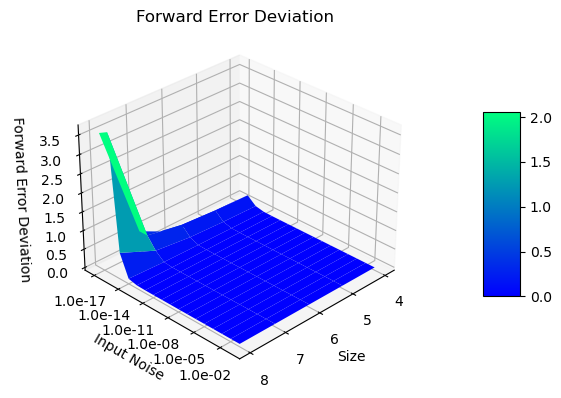

In [364]:
PlotSurface('Forward Error Deviation')

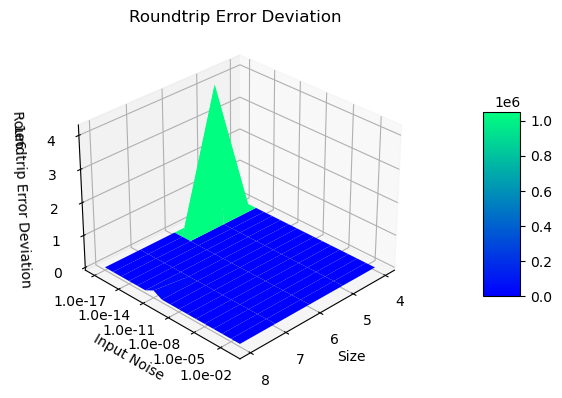

In [365]:
PlotSurface('Roundtrip Error Deviation')

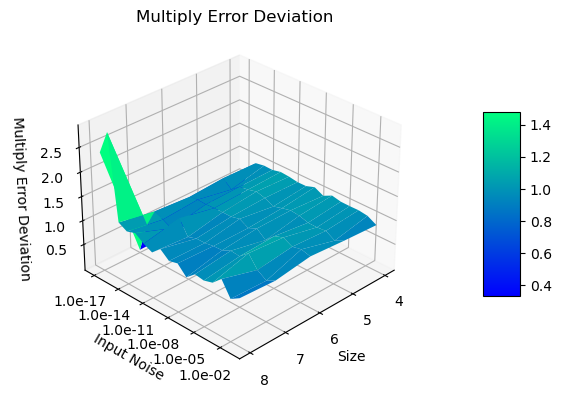

In [367]:
PlotSurface('Multiply Error Deviation')

In [ ]:
PlotSurface('Multiply Error Mean')

# Normalized Error Histogram

In [ ]:
sHisto = [str(i/10) for i in range(-30, 32, 2)]
df[sHisto].head()

In [ ]:
df['Label'] = df['Size'].astype(str) + ' ' + df['Noise'].astype(str)
df.columns

In [ ]:
dfHisto = df[(df['Noise'].isin([1e-17, 1e-15, 1e-10, 0])) & (df['Size']==8)].set_index('Label')
dfHisto[sHisto].T.plot(grid=True, title='Adjugate Normalized Error Histogram')

In [ ]:
dfHisto = df[(df['Noise'].isin([1e-17, 1e-16, 1e-15, 1e-10])) & (df['Size']==7)].set_index('Label')
dfHisto[sHisto].T.plot(grid=True, title='Adjugate Normalized Error Histogram')

In [ ]:
dfHisto = df[(df['Noise'].isin([1e-17, 1e-15, 1e-6, 1e-1])) & (df['Size']==6)].set_index('Label')
dfHisto[sHisto].T.plot(grid=True, title='Adjugate Normalized Error Histogram')

In [ ]:
dfHisto = df[(df['Noise'].isin([1e-17, 1e-15, 1e-6, 1e-1])) & (df['Size']==5)].set_index('Label')
dfHisto[sHisto].T.plot(grid=True, title='Adjugate Normalized Error Histogram')

In [ ]:
dfHisto = df[(df['Noise']==0)].set_index('Label')
dfHisto[sHisto].T.plot(grid=True, title='Adjugate Normalized Error Histogram')

In [ ]:
dfHisto = df[(df['Noise']==1e-11)].set_index('Label')
dfHisto[sHisto].T.plot(grid=True, title='Adjugate Normalized Error Histogram')

In [ ]:
dfHisto = df[(df['Noise']==1e-10)].set_index('Label')
dfHisto[sHisto].T.plot(grid=True, title='Adjugate Normalized Error Histogram')